In [1]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv',sep=',')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check the shape of the dataset
data.shape

(284807, 31)

In [6]:
# we will check if there are any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# we can check that how many values are present in the 'class' having values as 0 or 1
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# dividing the dataframe into fraud and non fraud data
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [10]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
# now we are going to select the 492 non-fraud entries from the dataframe 
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data=fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,86407.0,1.975914,0.520582,-0.921424,3.698254,0.840947,0.488607,0.204290,-0.116703,-0.749217,...,0.024357,0.311568,-0.065104,-0.973535,0.311392,0.155051,-0.020591,-0.057722,11.01,0
980,147441.0,-0.383859,0.491402,1.306240,-0.910023,0.487195,0.550041,0.236928,0.260130,0.210751,...,0.305961,1.000313,-0.298308,0.323600,-0.125846,-0.284221,0.179509,0.163101,9.99,0
981,139075.0,1.787155,-1.617071,-1.140874,-0.937252,-0.791878,0.097439,-0.749371,0.025273,-0.215018,...,0.351096,0.550282,-0.024122,0.307207,-0.203156,-0.223969,-0.046904,-0.023155,211.00,0
982,50384.0,-0.290031,0.122791,1.101616,-1.447254,-0.178462,-0.596252,0.499743,-0.101942,-1.921692,...,-0.079206,-0.540196,0.242038,-0.047935,-0.632784,-0.756430,0.114180,0.154089,66.70,0


In [13]:
# now let us again check the value counts
data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [15]:
# now dividing the dataframe into dependent and independent varaible
X=data.drop(['Class'], axis=1)
y=data.Class

# check the shape
X.shape, y.shape

((984, 30), (984,))

In [16]:
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [17]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,71192.0,1.187481,0.209676,0.678692,1.484880,-0.440387,-0.445655,-0.003806,-0.126105,0.389967,...,-0.099873,-0.048917,0.148300,-0.133697,0.442882,0.766656,-0.275066,0.043030,0.024363,9.99
898,140218.0,1.978330,-0.293459,-0.301501,0.339549,-0.657821,-0.796722,-0.350761,-0.176371,0.871605,...,-0.100063,-0.242327,-0.574900,0.419615,0.062705,-0.619855,0.225113,-0.035304,-0.038864,21.80
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,147349.0,-0.423359,1.208531,-0.863889,-0.757632,0.950305,-0.373418,0.693454,0.269262,-0.113073,...,0.131214,-0.354630,-0.800758,0.037794,0.177457,-0.360640,0.094725,0.056936,-0.182710,14.28
739,66690.0,-0.887125,0.191161,1.769811,0.314747,0.089468,-0.275906,0.516642,0.196691,-0.117810,...,0.038646,0.123785,0.024430,0.315323,-0.002872,-0.550425,-0.720778,0.134337,0.179947,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,40876.0,-0.816087,0.145216,2.372972,0.719203,-0.204028,0.639333,0.563853,0.195368,0.175040,...,0.139953,0.131742,0.568350,-0.070600,0.210115,0.141593,-0.326222,-0.055767,-0.117680,97.59
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,74935.0,1.087222,0.166238,0.360477,0.917031,0.088761,0.362004,-0.099559,0.202151,-0.255071,...,-0.156665,0.188348,0.620553,-0.076534,-0.274711,0.506619,-0.256403,0.048726,0.007273,14.90


In [18]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X_train,y_train

(array([[-0.29562417,  0.64269153, -0.46780112, ..., -0.04336194,
         -0.04065981, -0.42830623],
        [ 1.10281608,  0.78198454, -0.60376879, ..., -0.1180752 ,
         -0.19090662, -0.36760358],
        [-1.36519008, -2.11585979,  1.23296428, ...,  2.49707402,
         -2.45803882, -0.47451425],
        ...,
        [-1.4929067 , -0.39915821,  0.29827688, ..., -1.35462981,
          1.57840753, -0.32345153],
        [-0.21979243,  0.62503272, -0.4795398 , ..., -0.03792906,
         -0.08127206, -0.40306914],
        [ 1.25069102,  0.79320879, -0.55081022, ..., -0.15488753,
         -0.27204396, -0.4705051 ]]), 845    0
 898    0
 45     1
 536    0
 739    0
       ..
 202    1
 711    0
 31     1
 882    0
 563    0
 Name: Class, Length: 787, dtype: int64)

In [20]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [21]:
X_train.shape

(787, 30)

In [22]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [23]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout,MaxPool1D

In [24]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [26]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 21ms/step - loss: 0.3995 - accuracy: 0.8501 - val_loss: 0.5155 - val_accuracy: 0.9188
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1833 - accuracy: 0.9428 - val_loss: 0.4809 - val_accuracy: 0.8832
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1826 - accuracy: 0.9403 - val_loss: 0.4898 - val_accuracy: 0.6091
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1686 - accuracy: 0.9416 - val_loss: 0.4821 - val_accuracy: 0.6041
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1663 - accuracy: 0.9390 - val_loss: 0.4898 - val_accuracy: 0.6091
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.1621 - accuracy: 0.9416 - val_loss: 0.5837 - val_accuracy: 0.5076
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1518 - accuracy: 0.9428 - val_loss: 0.4645 - val_accuracy: 0.6599
Epoch 8/20
25

In [34]:
test_scores= model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


7/7 - 0s - loss: 0.2208 - accuracy: 0.9239 - 33ms/epoch - 5ms/step
Test loss: 0.2208133041858673
Test accuracy: 0.9238578677177429


In [29]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

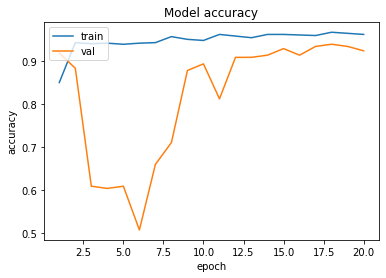

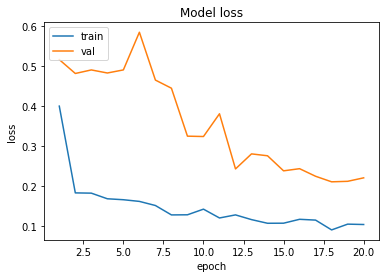

In [30]:
plot_learningcurve(history,20)

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([[1.21230811e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.74509764e-01],
       [1.00000000e+00],
       [1.65150523e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.39102936e-02],
       [1.00000000e+00],
       [3.22641432e-02],
       [2.50424743e-01],
       [1.00000000e+00],
       [3.94855440e-02],
       [9.99996543e-01],
       [6.07289970e-01],
       [1.59009099e-02],
       [9.99660134e-01],
       [1.67220831e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99996901e-01],
       [9.99995053e-01],
       [3.58997881e-02],
       [1.48467422e-02],
       [2.13860571e-02],
       [1.00000000e+00],
       [1.74663365e-02],
       [2.42969394e-02],
       [5.22581458e-01],
       [2.63169706e-02],
       [9.99923229e-01],
       [2.27031112e-03],
       [3.23798954e-02],
       [1.00000000e+00],
       [1.22088194e-03],
       [9.99310732e-01],
